In [3]:
import pandas as pd
import numpy as np
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

dat=pd.read_csv(url,header=None)
y=dat[0]
# y.to_csv('ywine.csv')
del dat[0]
# dat.to_csv('wineblind.csv')
dat.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


https://scikit-learn.org/stable/modules/clustering.html#clustering

In [4]:
dat.std()

1       0.811827
2       1.117146
3       0.274344
4       3.339564
5      14.282484
6       0.625851
7       0.998859
8       0.124453
9       0.572359
10      2.318286
11      0.228572
12      0.709990
13    314.907474
dtype: float64

In [5]:
dat.shape

(178, 13)

In [4]:
from scipy.stats import entropy

N = 10000000
entropy(np.repeat(1/N, N))

16.118095650958267

In [6]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, SpectralClustering

pipe = Pipeline([('scaler', StandardScaler()),
                 ('kmeans', KMeans())])

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
kmeans.predict(dat)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [9]:
kmeans.cluster_centers_.shape

(3, 13)

In [10]:
kmeans.cluster_centers_

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [11]:
kmeans.labels_[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
kmeans.predict(dat)[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
np.all(kmeans.labels_ == kmeans.predict(dat))

True

In [14]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 47, 69]))

In [15]:
kmeans.inertia_

2370689.686782968

In [16]:
distorsion = []

X = scale(dat.astype(np.float64))

for k in np.arange(1, 15):
    km = KMeans(n_clusters=k, 
                n_init=20, 
                max_iter=5000, 
                n_jobs=-1, 
                random_state=0)
    distorsion.append(km.fit(X).inertia_)

In [17]:
distorsion

[2314.0,
 1658.7588524290954,
 1277.9284888446423,
 1175.428333103347,
 1101.6320146831795,
 1041.2627647232596,
 987.5360960826916,
 940.2833110870572,
 889.5309779249254,
 851.8813851482951,
 818.3887613076598,
 790.7665737168923,
 767.0493564324913,
 734.6641958447947]

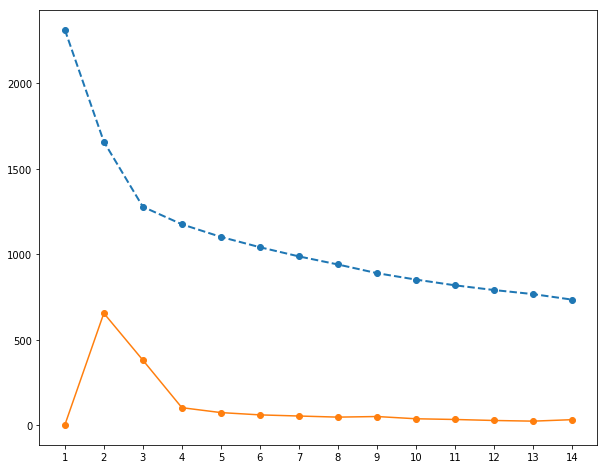

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

diferencias = np.concatenate((np.array([1]),-np.diff(distorsion)))

plt.figure(figsize=(10, 8))
plt.plot(np.arange(1,15),distorsion,'--o',linewidth=2);
plt.plot(np.arange(1,15),diferencias,'-o')
plt.xticks(np.arange(1,15));

In [20]:
y.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [18]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [21]:
kmfinal = KMeans(n_clusters=3, 
                 n_init=50, 
                 max_iter=1000 ,
                 n_jobs=-1,
                 random_state=0)
kmfinal.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
kmfinal.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [23]:
kmfinal.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [24]:
np.unique(kmfinal.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([51, 65, 62]))

In [23]:
y.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [26]:
from sklearn.metrics import normalized_mutual_info_score as nmi

nmi(y, kmfinal.labels_)

0.8758984675407874

In [27]:
nmi([0, 1, 1], [1, 0, 0])

1.0

In [34]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_2d = pca.fit_transform(X)
X_2d.shape, X.shape

((178, 2), (178, 13))

In [29]:
etiquetas = pd.Series(kmfinal.labels_)
etiquetas.value_counts()

1    65
2    62
0    51
dtype: int64

In [30]:
y.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [35]:
color = etiquetas.replace([2,1,0],['r','b','y'])
color_true = y.replace([1,2,3],['r','b','y'])

In [36]:
color_true.shape, color.shape

((178,), (178,))

In [37]:
X_2d.shape

(178, 2)

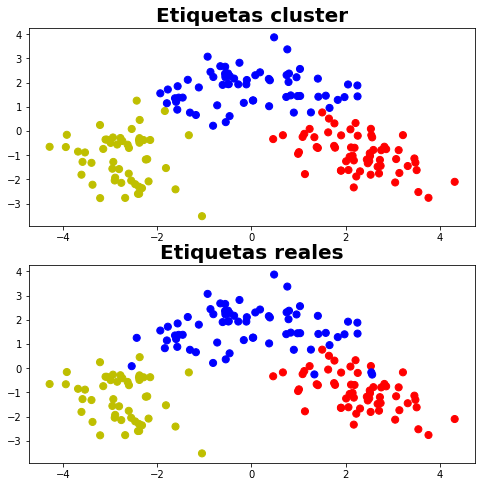

In [39]:
f , ax = plt.subplots(2,1,figsize=(8,8))

ax[0].scatter(X_2d[:,0],X_2d[:,1],c=color.values,s=50);
ax[0].set_title('Etiquetas cluster', fontweight='bold', fontsize=20)
ax[1].scatter(X_2d[:,0],X_2d[:,1],c=color_true.values,s=50);
ax[1].set_title('Etiquetas reales', fontweight='bold', fontsize=20);

In [46]:
spec_clust =  SpectralClustering(n_clusters=3)
spec_clust.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)

In [47]:
nmi(y, spec_clust.labels_)

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5869625775008457